# Predicting Autistic Traits in Toddlers

## Imports

In [52]:
# import python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

#imports for model object and metric functions
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

#visulization settings
import graphviz
from sklearn.tree import export_graphviz
import matplotlib.style as style 
style.available
style.use('seaborn-notebook') #sets the size of the charts
style.use('seaborn-colorblind') #sets color of charts

## Acquire

<div class="alert alert-block alert-success">
<b>Acquire Summary :</b> 
<br>- This dataset was developed by Dr Fadi Fayez Thabtah using a mobile app called ASDTests (ASDtests.com) to screen for autism traits in toddlers and acquired in csv format from kaggle.com.  
<br>- This data set has 1054 rows and 19 columns</div> 

In [2]:
df = pd.read_csv('Toddler Autism dataset July 2018.csv')

In [3]:
df.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case_No                 1054 non-null   int64 
 1   A1                      1054 non-null   int64 
 2   A2                      1054 non-null   int64 
 3   A3                      1054 non-null   int64 
 4   A4                      1054 non-null   int64 
 5   A5                      1054 non-null   int64 
 6   A6                      1054 non-null   int64 
 7   A7                      1054 non-null   int64 
 8   A8                      1054 non-null   int64 
 9   A9                      1054 non-null   int64 
 10  A10                     1054 non-null   int64 
 11  Age_Mons                1054 non-null   int64 
 12  Qchat-10-Score          1054 non-null   int64 
 13  Sex                     1054 non-null   object
 14  Ethnicity               1054 non-null   object
 15  Jaun

In [5]:
df.describe()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score
count,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000
mean,527.500000,0.563567,0.448767,0.401328,0.512334,0.524668,0.576850,0.649905,0.459203,0.489564,0.586338,27.867173,5.212524
std,304.407895,0.496178,0.497604,0.490400,0.500085,0.499628,0.494293,0.477226,0.498569,0.500128,0.492723,7.980354,2.907304
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000
25%,264.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,3.000000
50%,527.500000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,30.000000,5.000000
75%,790.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,8.000000
max,1054.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,10.000000


In [6]:
df.columns

Index(['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age_Mons', 'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who completed the test', 'Class/ASD Traits '],
      dtype='object')

In [7]:
df.shape

(1054, 19)

In [8]:
def summarize_dataset(df):
    print(df.info())
    print('This dataset has 1054 rows and 19 columns')

In [9]:
summarize_dataset(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case_No                 1054 non-null   int64 
 1   A1                      1054 non-null   int64 
 2   A2                      1054 non-null   int64 
 3   A3                      1054 non-null   int64 
 4   A4                      1054 non-null   int64 
 5   A5                      1054 non-null   int64 
 6   A6                      1054 non-null   int64 
 7   A7                      1054 non-null   int64 
 8   A8                      1054 non-null   int64 
 9   A9                      1054 non-null   int64 
 10  A10                     1054 non-null   int64 
 11  Age_Mons                1054 non-null   int64 
 12  Qchat-10-Score          1054 non-null   int64 
 13  Sex                     1054 non-null   object
 14  Ethnicity               1054 non-null   object
 15  Jaun

In [10]:
df.isna().sum()

Case_No                   0
A1                        0
A2                        0
A3                        0
A4                        0
A5                        0
A6                        0
A7                        0
A8                        0
A9                        0
A10                       0
Age_Mons                  0
Qchat-10-Score            0
Sex                       0
Ethnicity                 0
Jaundice                  0
Family_mem_with_ASD       0
Who completed the test    0
Class/ASD Traits          0
dtype: int64

In [11]:
df.Age_Mons.value_counts()

36    320
24     70
12     67
30     67
28     42
33     36
26     36
34     34
15     31
31     30
35     30
32     30
23     28
22     27
25     26
29     24
27     23
19     21
20     21
14     19
13     18
18     16
16     13
21     13
17     12
Name: Age_Mons, dtype: int64

In [12]:
df.Ethnicity.value_counts()

White European    334
asian             299
middle eastern    188
south asian        60
black              53
Hispanic           40
Others             35
Latino             26
Pacifica            8
mixed               8
Native Indian       3
Name: Ethnicity, dtype: int64

In [13]:
df.Jaundice.value_counts()

no     766
yes    288
Name: Jaundice, dtype: int64

In [14]:
df.Family_mem_with_ASD.value_counts()

no     884
yes    170
Name: Family_mem_with_ASD, dtype: int64

In [15]:
df.columns

Index(['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age_Mons', 'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who completed the test', 'Class/ASD Traits '],
      dtype='object')

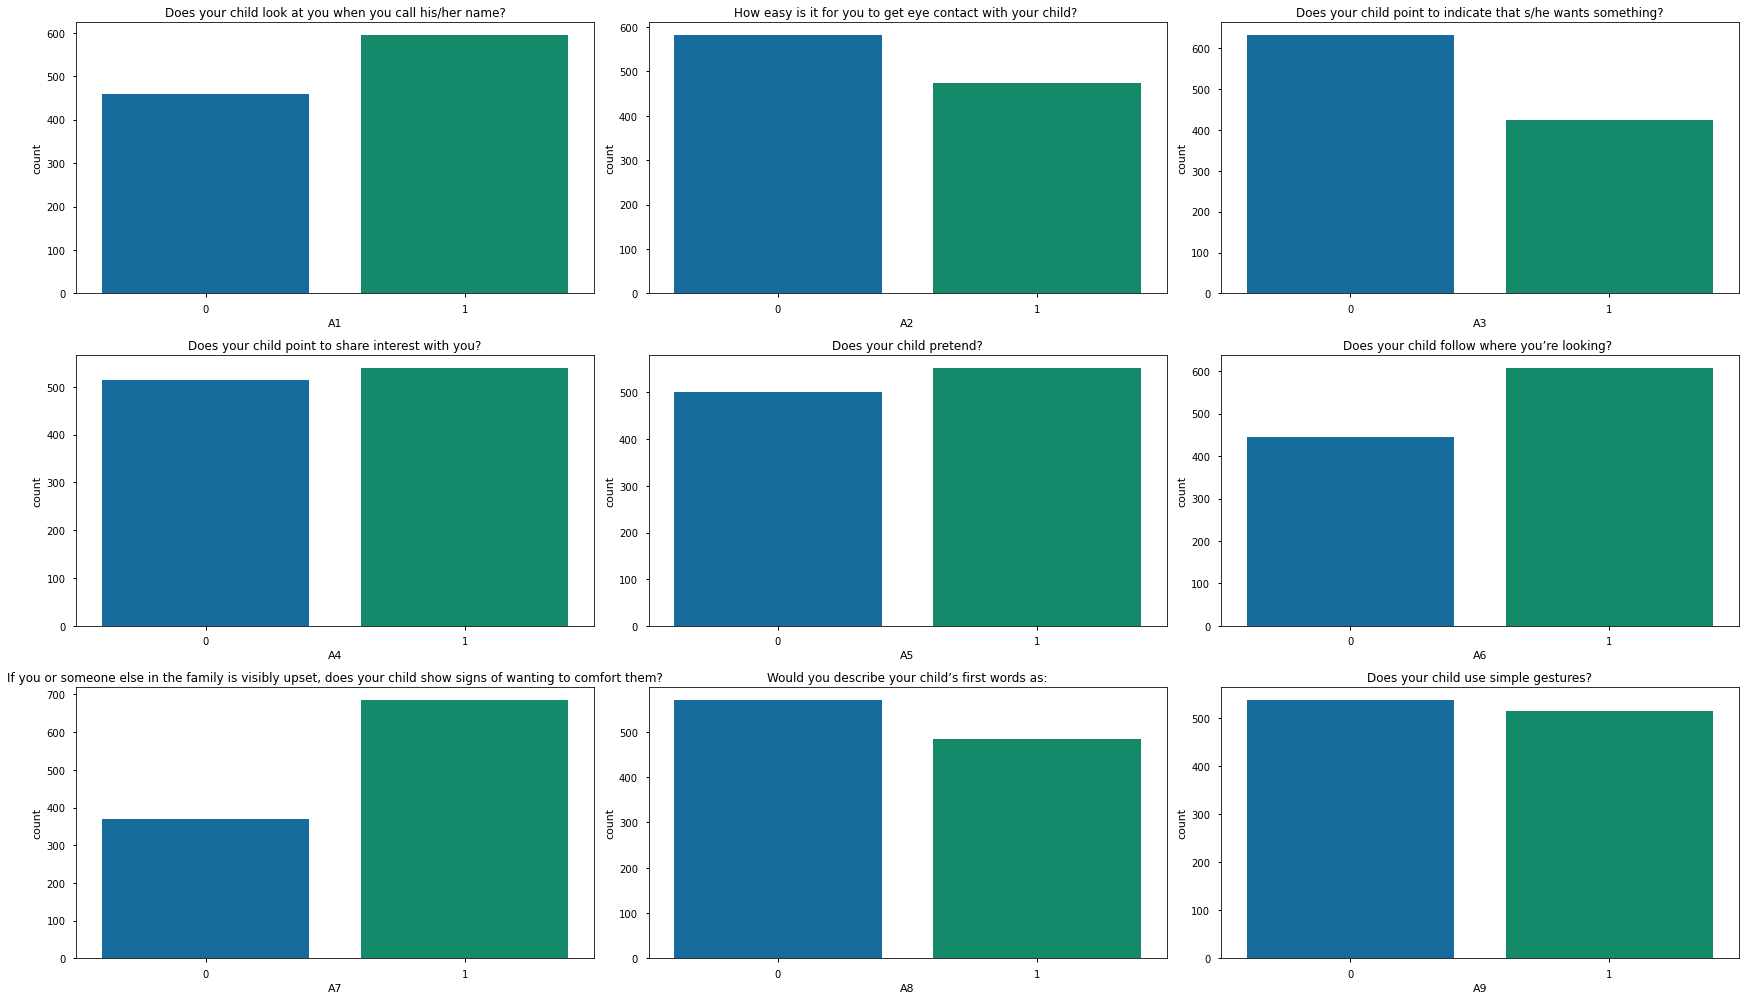

In [16]:
#Subplots of individual features
plt.figure(figsize=(24, 14))

plt.subplot(331)
sns.countplot(df.A1)
plt.title('Does your child look at you when you call his/her name?')

plt.subplot(332)
sns.countplot(df.A2)
plt.title('How easy is it for you to get eye contact with your child? ')

plt.subplot(333)
sns.countplot(df.A3)
plt.title('Does your child point to indicate that s/he wants something?')

plt.subplot(334)
sns.countplot(df.A4)
plt.title('Does your child point to share interest with you?')

plt.subplot(335)
sns.countplot(df.A5)
plt.title('Does your child pretend?')

plt.subplot(336)
sns.countplot(df.A6)
plt.title('Does your child follow where you’re looking? ')

plt.subplot(337)
sns.countplot(df.A7)
plt.title('If you or someone else in the family is visibly upset, does your child show signs of wanting to comfort them?')

plt.subplot(338)
sns.countplot(df.A8)
plt.title('Would you describe your child’s first words as:')

plt.subplot(339)
sns.countplot(df.A9)
plt.title('Does your child use simple gestures?')

#plt.subplot(3310)
#sns.countplot(df.A10)
#plt.title('Does your child stare at nothing with no apparent purpose?')

plt.tight_layout()
plt.show()

## Prepare

#### Wrangle Function

In [60]:
def wrangle_autism():
    '''
    This function will acquire data locally and turn dataset into
    a clean dataframe
    '''
    df = pd.read_csv('Toddler Autism dataset July 2018.csv')
    df.rename(columns={'A1': 'name_response', 
                       'A2': 'eye_contact', 
                       'A3': 'pointing', 
                       'A4': 'shared_interest', 
                       'A5': 'pretend_play', 
                       'A6': 'joint_attention', 
                       'A7': 'emotions',
                       'A8': 'vocal',
                       'A9': 'gestures',
                       'A10': 'blank_gaze',
                       'Age_Mons': 'age',
                       'Sex': 'sex',
                       'Ethnicity': 'ethnicity',
                       'Jaundice': 'jaundice',
                       'Family_mem_with_ASD': 'family_mem_with_asd',
                       'Class/ASD Traits ': 'asd_traits'}, inplace=True)
    binary(df)
    dummies = pd.get_dummies(df[['sex']], drop_first=True)
    df = pd.concat([df, dummies], axis=1) 
    df['asd_traits'] = df[['asd_traits']].replace({'No': 0, 'Yes': 1})
    df['ethnicity'] = df[['ethnicity']].replace({'White European': 1,
                                             'asian': 2, 
                                             'middle eastern': 3, 
                                             'south asian': 2, 
                                             'black': 4, 
                                             'Hispanic': 5, 
                                             'Others': 6, 
                                             'Latino': 5, 
                                             'mixed': 6,
                                             'Pacifica': 6,
                                             'Native Indian': 6})
    df.drop(columns = ['Qchat-10-Score', 'Who completed the test', 'sex'], inplace=True)
    df = df.set_index('Case_No')
    return df
                   

#### Rename Columns

In [18]:
df.columns

Index(['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age_Mons', 'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who completed the test', 'Class/ASD Traits '],
      dtype='object')

In [19]:
df.rename(columns={'A1': 'name_response', 
                   'A2': 'eye_contact', 
                   'A3': 'pointing', 
                   'A4': 'shared_interest', 
                   'A5': 'pretend_play', 
                   'A6': 'joint_attention', 
                   'A7': 'emotions',
                   'A8': 'vocal',
                   'A9': 'gestures',
                   'A10': 'blank_gaze',
                   'Age_Mons': 'age',
                   'Sex': 'sex',
                   'Ethnicity': 'ethnicity',
                   'Jaundice': 'jaundice',
                   'Family_mem_with_ASD': 'family_mem_with_asd',
                   'Class/ASD Traits ': 'asd_traits'}, inplace=True)
                   
                   
                   

In [20]:
df.head()

,Case_No,name_response,eye_contact,pointing,shared_interest,pretend_play,joint_attention,emotions,vocal,gestures,blank_gaze,age,Qchat-10-Score,sex,ethnicity,jaundice,family_mem_with_asd,Who completed the test,asd_traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


In [21]:
df.drop(columns = ['Qchat-10-Score', 'Who completed the test'], inplace=True)

In [22]:
df = wrangle_autism()

In [23]:
df.head()

,name_response,eye_contact,pointing,shared_interest,pretend_play,joint_attention,emotions,vocal,gestures,blank_gaze,age,sex,ethnicity,jaundice,family_mem_with_asd,asd_traits
Case_No,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,1,1,0,1,28,f,middle eastern,yes,no,No
2,1,1,0,0,0,1,1,0,0,0,36,m,White European,yes,no,Yes
3,1,0,0,0,0,0,1,1,0,1,36,m,middle eastern,yes,no,Yes
4,1,1,1,1,1,1,1,1,1,1,24,m,Hispanic,no,no,Yes
5,1,1,0,1,1,1,1,1,1,1,20,f,White European,no,yes,Yes


In [24]:
dummies = pd.get_dummies(df[['sex']], drop_first=True)
df = pd.concat([df, dummies], axis=1)                        


In [25]:
#function to change columns from yes/no to o/1
def binary(df):
    binary_columns = ['jaundice','family_mem_with_asd', 'family_mem_with_asd']
    for feature in binary_columns:
        df[feature].replace(to_replace='yes', value=1, inplace=True)
        df[feature].replace(to_replace='no', value=0, inplace=True)

In [26]:
binary(df)

In [62]:
df.drop(columns = ['sex'], inplace=True)

In [63]:
df.head()

,name_response,eye_contact,pointing,shared_interest,pretend_play,joint_attention,emotions,vocal,gestures,blank_gaze,age,ethnicity,jaundice,family_mem_with_asd,asd_traits,sex_m
Case_No,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,1,1,0,1,28,3,1,0,0,0
2,1,1,0,0,0,1,1,0,0,0,36,1,1,0,1,1
3,1,0,0,0,0,0,1,1,0,1,36,3,1,0,1,1
4,1,1,1,1,1,1,1,1,1,1,24,5,0,0,1,1
5,1,1,0,1,1,1,1,1,1,1,20,1,0,1,1,0


In [30]:
df.ethnicity.value_counts()

White European    334
asian             299
middle eastern    188
south asian        60
black              53
Hispanic           40
Others             35
Latino             26
Pacifica            8
mixed               8
Native Indian       3
Name: ethnicity, dtype: int64

In [31]:
df['asd_traits'] = df[['asd_traits']].replace({'No': 0, 'Yes': 1})

In [32]:
df['ethnicity'] = df[['ethnicity']].replace({'White European': 1,
                                             'asian': 2, 
                                             'middle eastern': 3, 
                                             'south asian': 2, 
                                             'black': 4, 
                                             'Hispanic': 5, 
                                             'Others': 6, 
                                             'Latino': 5, 
                                             'mixed': 6,
                                             'Pacifica': 6,
                                             'Native Indian': 6})

In [33]:
df.ethnicity.value_counts()

2    359
1    334
3    188
5     66
6     54
4     53
Name: ethnicity, dtype: int64

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1054 entries, 1 to 1054
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   name_response        1054 non-null   int64 
 1   eye_contact          1054 non-null   int64 
 2   pointing             1054 non-null   int64 
 3   shared_interest      1054 non-null   int64 
 4   pretend_play         1054 non-null   int64 
 5   joint_attention      1054 non-null   int64 
 6   emotions             1054 non-null   int64 
 7   vocal                1054 non-null   int64 
 8   gestures             1054 non-null   int64 
 9   blank_gaze           1054 non-null   int64 
 10  age                  1054 non-null   int64 
 11  sex                  1054 non-null   object
 12  ethnicity            1054 non-null   int64 
 13  jaundice             1054 non-null   int64 
 14  family_mem_with_asd  1054 non-null   int64 
 15  asd_traits           1054 non-null   int64 
 16  sex_m 

In [35]:
#split with 
def train_validate_test_split(df, target, seed):
    '''
    spilts our data  into train, validate, test
    by taking in a dataframe and dividing into
    separate
    '''
    # Train, Validate, and test
    train_and_validate, test = train_test_split(
        df, test_size=0.2, random_state=seed)
    train, validate = train_test_split(
        train_and_validate,
        test_size=0.3,
        random_state=seed)
    
    # Split with X and y
    X_train = train.drop(columns=[target])
    y_train = train[target]
    
    X_validate = validate.drop(columns=[target])
    y_validate = validate[target]
    
    X_test = test.drop(columns=[target])
    y_test = test[target]
    
    return train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test   

In [64]:
train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test = train_validate_test_split(df, 'asd_traits', 123)

In [65]:
print(train.shape)
print(validate.shape)
print(test.shape)

(590, 16)
(253, 16)
(211, 16)


## Explore

In [38]:
train.columns

Index(['name_response', 'eye_contact', 'pointing', 'shared_interest',
       'pretend_play', 'joint_attention', 'emotions', 'vocal', 'gestures',
       'blank_gaze', 'age', 'sex', 'ethnicity', 'jaundice',
       'family_mem_with_asd', 'asd_traits', 'sex_m'],
      dtype='object')

In [39]:
X_train.columns

Index(['name_response', 'eye_contact', 'pointing', 'shared_interest',
       'pretend_play', 'joint_attention', 'emotions', 'vocal', 'gestures',
       'blank_gaze', 'age', 'sex', 'ethnicity', 'jaundice',
       'family_mem_with_asd', 'sex_m'],
      dtype='object')

In [40]:
import explore

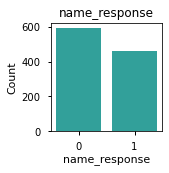

   name_response  Count  Percent
1              0    594    56.36
0              1    460    43.64
_________________________________________________________________


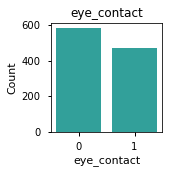

   eye_contact  Count  Percent
0            0    581    55.12
1            1    473    44.88
_________________________________________________________________


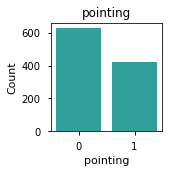

   pointing  Count  Percent
0         0    631    59.87
1         1    423    40.13
_________________________________________________________________


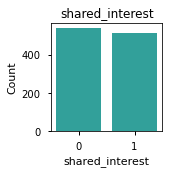

   shared_interest  Count  Percent
1                0    540    51.23
0                1    514    48.77
_________________________________________________________________


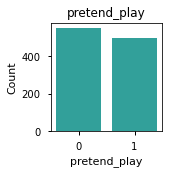

   pretend_play  Count  Percent
1             0    553    52.47
0             1    501    47.53
_________________________________________________________________


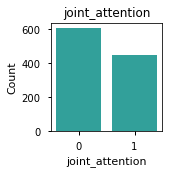

   joint_attention  Count  Percent
1                0    608    57.69
0                1    446    42.31
_________________________________________________________________


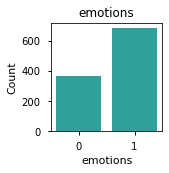

   emotions  Count  Percent
1         1    685    64.99
0         0    369    35.01
_________________________________________________________________


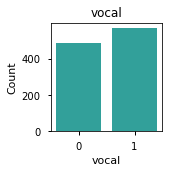

   vocal  Count  Percent
0      1    570    54.08
1      0    484    45.92
_________________________________________________________________


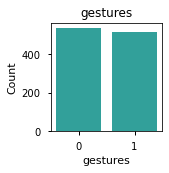

   gestures  Count  Percent
0         0    538    51.04
1         1    516    48.96
_________________________________________________________________


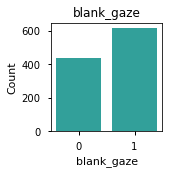

   blank_gaze  Count  Percent
1           1    618    58.63
0           0    436    41.37
_________________________________________________________________


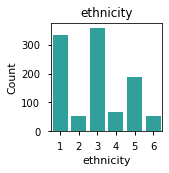

   ethnicity  Count  Percent
2          3    359    34.06
1          1    334    31.69
3          5    188    17.84
5          4     66     6.26
6          2     54     5.12
4          6     53     5.03
_________________________________________________________________


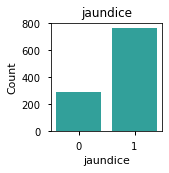

   jaundice  Count  Percent
0         1    766    72.68
1         0    288    27.32
_________________________________________________________________


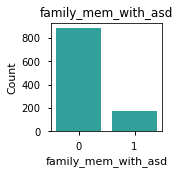

   family_mem_with_asd  Count  Percent
0                    0    884    83.87
1                    1    170    16.13
_________________________________________________________________


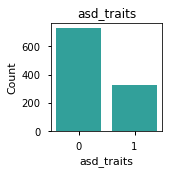

   asd_traits  Count  Percent
1           0    728    69.07
0           1    326    30.93
_________________________________________________________________


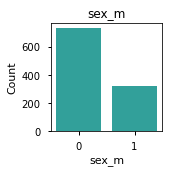

   sex_m  Count  Percent
1      0    735    69.73
0      1    319    30.27
_________________________________________________________________


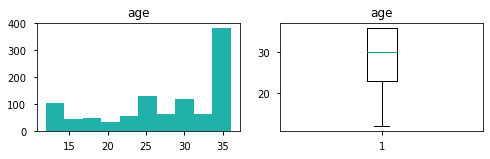

count    1054.000000
mean       27.867173
std         7.980354
min        12.000000
25%        23.000000
50%        30.000000
75%        36.000000
max        36.000000
Name: age, dtype: float64


In [41]:
explore.explore_univariate(df, explore.cat_vars, explore.quant_vars)

<div class="alert alert-block alert-success">
<b>Univariate Takeaways :</b> 
<br>- 56% of toddlers in this dataset respond to name when called
<br>- 55% of toddlers in this dataset make eye contact 
<br>- 60% of toddlers in this dataset point to what they want  
<br>- 51% of toddlers in this dataset show shared_interest
<br>- 52% of toddlers in this dataset engage in pretend play 
<br>- 58% of toddlers in this dataset show joint attention
<br>- 65% of toddlers in this dataset social emotion recognition
<br>- 54% of toddlers in this dataset are not vocal
<br>- 51% of toddlers in this dataset can communicate using gestures
<br>- 59% of toddlers in this dataset engage in blank gazing
<br>- The majority (34%) of toddlers in this data set are middle eastern
<br>- 73% of toddlers in this dataset had jaundice as a baby
<br>- 84% of toddlers in this dataset do not have a family member with asd
<br>- Age is mostly normally distributed, with a spike at the 35 month age    
</div> 

name_response 
_____________________

         chi2       p-value  degrees of freedom
0  142.434654  7.813447e-33                   1

observed:
 asd_traits       0    1  All
name_response               
0              133  115  248
1               30  312  342
All            163  427  590

expected:
            0           1
0  68.515254  179.484746
1  94.484746  247.515254


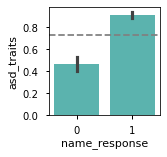


_____________________

eye_contact 
_____________________

         chi2       p-value  degrees of freedom
0  105.480515  9.583564e-25                   1

observed:
 asd_traits     0    1  All
eye_contact               
0            145  177  322
1             18  250  268
All          163  427  590

expected:
            0           1
0  88.959322  233.040678
1  74.040678  193.959322


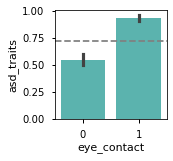


_____________________

pointing 
_____________________

         chi2       p-value  degrees of freedom
0  101.506912  7.121450e-24                   1

observed:
 asd_traits    0    1  All
pointing                 
0           149  193  342
1            14  234  248
All         163  427  590

expected:
            0           1
0  94.484746  247.515254
1  68.515254  179.484746


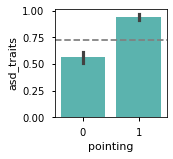


_____________________

shared_interest 
_____________________

         chi2       p-value  degrees of freedom
0  142.579053  7.265572e-33                   1

observed:
 asd_traits         0    1  All
shared_interest               
0                140  131  271
1                 23  296  319
All              163  427  590

expected:
            0           1
0  74.869492  196.130508
1  88.130508  230.869492


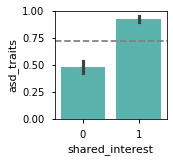


_____________________

pretend_play 
_____________________

         chi2       p-value  degrees of freedom
0  181.535951  2.239070e-41                   1

observed:
 asd_traits      0    1  All
pretend_play               
0             148  122  270
1              15  305  320
All           163  427  590

expected:
           0          1
0  74.59322  195.40678
1  88.40678  231.59322


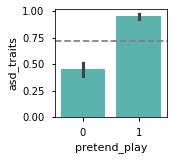


_____________________

joint_attention 
_____________________

         chi2       p-value  degrees of freedom
0  189.772483  3.564456e-43                   1

observed:
 asd_traits         0    1  All
joint_attention               
0                139   97  236
1                 24  330  354
All              163  427  590

expected:
       0      1
0  65.2  170.8
1  97.8  256.2


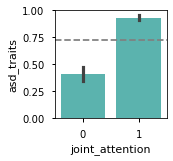


_____________________

emotions 
_____________________

        chi2       p-value  degrees of freedom
0  160.89785  7.202484e-37                   1

observed:
 asd_traits    0    1  All
emotions                 
0           117   72  189
1            46  355  401
All         163  427  590

expected:
             0           1
0   52.215254  136.784746
1  110.784746  290.215254


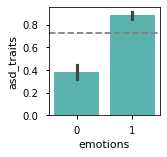


_____________________

vocal 
_____________________

        chi2       p-value  degrees of freedom
0  91.922545  9.013627e-22                   1

observed:
 asd_traits    0    1  All
vocal                    
0           140  177  317
1            23  250  273
All         163  427  590

expected:
            0           1
0  87.577966  229.422034
1  75.422034  197.577966


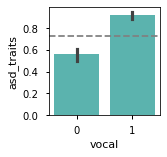


_____________________

gestures 
_____________________

         chi2       p-value  degrees of freedom
0  200.165715  1.921627e-45                   1

observed:
 asd_traits    0    1  All
gestures                 
0           158  134  292
1             5  293  298
All         163  427  590

expected:
            0           1
0  80.671186  211.328814
1  82.328814  215.671186


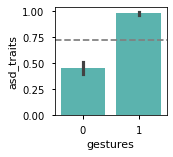


_____________________

blank_gaze 
_____________________

        chi2   p-value  degrees of freedom
0  19.317897  0.000011                   1

observed:
 asd_traits    0    1  All
blank_gaze               
0            92  154  246
1            71  273  344
All         163  427  590

expected:
            0           1
0  67.962712  178.037288
1  95.037288  248.962712


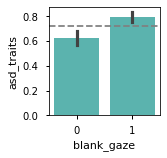


_____________________

ethnicity 
_____________________

        chi2   p-value  degrees of freedom
0  32.920763  0.000004                   5

observed:
 asd_traits    0    1  All
ethnicity                
1            41  149  190
2            55  163  218
3            51   53  104
4             5   20   25
5             8   17   25
6             3   25   28
All         163  427  590

expected:
            0           1
0  52.491525  137.508475
1  60.227119  157.772881
2  28.732203   75.267797
3   6.906780   18.093220
4   6.906780   18.093220
5   7.735593   20.264407


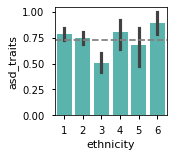


_____________________

jaundice 
_____________________

      chi2   p-value  degrees of freedom
0  4.86779  0.027363                   1

observed:
 asd_traits    0    1  All
jaundice                 
0           133  309  442
1            30  118  148
All         163  427  590

expected:
             0           1
0  122.111864  319.888136
1   40.888136  107.111864


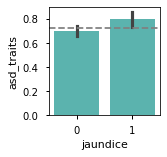


_____________________

family_mem_with_asd 
_____________________

       chi2   p-value  degrees of freedom
0  1.945139  0.163112                   1

observed:
 asd_traits             0    1  All
family_mem_with_asd               
0                    134  372  506
1                     29   55   84
All                  163  427  590

expected:
            0          1
0  139.79322  366.20678
1   23.20678   60.79322


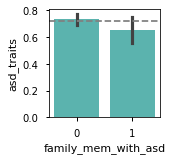


_____________________

asd_traits 
_____________________

         chi2        p-value  degrees of freedom
0  585.009234  3.051254e-129                   1

observed:
 asd_traits    0    1  All
asd_traits               
0           163    0  163
1             0  427  427
All         163  427  590

expected:
             0           1
0   45.032203  117.967797
1  117.967797  309.032203


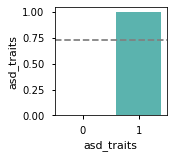


_____________________

sex_m 
_____________________

        chi2   p-value  degrees of freedom
0  12.383221  0.000433                   1

observed:
 asd_traits    0    1  All
sex_m                    
0            66  108  174
1            97  319  416
All         163  427  590

expected:
             0           1
0   48.071186  125.928814
1  114.928814  301.071186


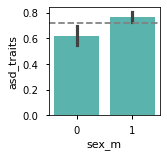


_____________________

age 
____________________



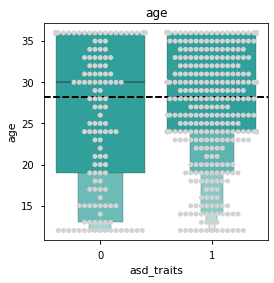

            count       mean       std   min   25%   50%   75%   max
asd_traits                                                          
0           163.0  27.319018  9.011451  12.0  19.0  30.0  36.0  36.0
1           427.0  28.533958  7.309756  12.0  24.0  30.0  36.0  36.0 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=33604.0, pvalue=0.5115652355934631)

____________________



In [42]:
explore.explore_bivariate(train, 'asd_traits', explore.cat_vars, explore.quant_vars)

<div class="alert alert-block alert-success">
<b>Bivariate Takeaways :</b> 
<br>-  
<br>- </div> 

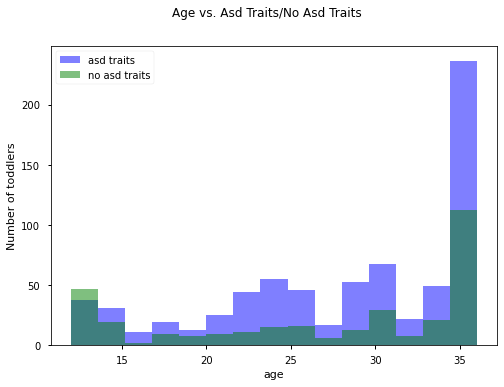

In [45]:
fig, ax = plt.subplots()

ax.hist(df[df["asd_traits"]==1]["age"], bins=15, alpha=0.5, color="blue", label="asd traits")
ax.hist(df[df["asd_traits"]==0]["age"], bins=15, alpha=0.5, color="green", label="no asd traits")

ax.set_xlabel("age")
ax.set_ylabel("Number of toddlers")

fig.suptitle("Age vs. Asd Traits/No Asd Traits")

ax.legend();

<div class="alert alert-block alert-success">
<b>Age vs Asd Traits :</b> 
<br>-  Over 300 toddlers in the dataset show asd traits around 35 months
<br>-  35 months is approximately 3 years and plenty of time has passed to determine if milestones are being met/progress is being made    
</div> 

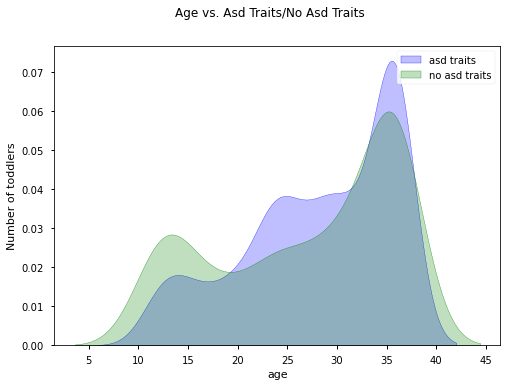

In [47]:
fig, ax = plt.subplots()

sns.kdeplot(df[df["asd_traits"]==1]["age"],shade=True, color="blue",label="asd traits", ax=ax)
sns.kdeplot(df[df["asd_traits"]==0]["age"],shade=True, color="green", label="no asd traits", ax=ax)

ax.set_xlabel("age")
ax.set_ylabel("Number of toddlers")

fig.suptitle("Age vs. Asd Traits/No Asd Traits")

ax.legend();

Text(0, 0.5, 'age')

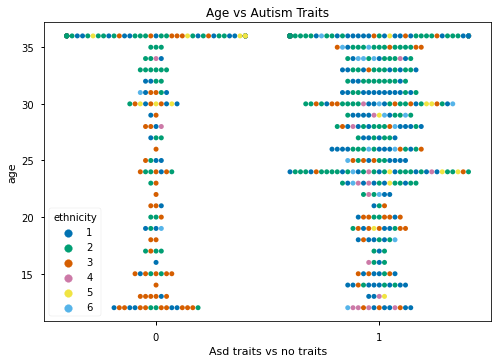

In [43]:
#Focus on the plots we are already interested in:
plt.title('Age vs Autism Traits')
sns.swarmplot(x= 'asd_traits', y= 'age', data = train, hue= 'ethnicity')
plt.xlabel('Asd traits vs no traits')
plt.ylabel('age')

<AxesSubplot:>

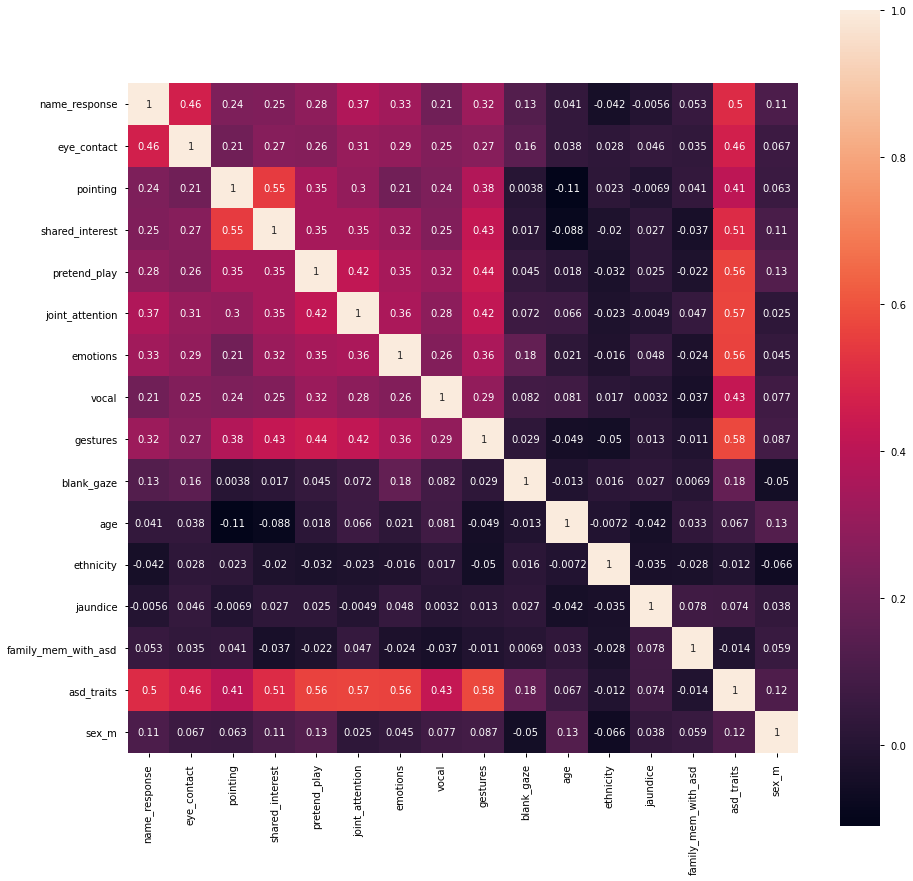

In [70]:
corr = df.corr( )
plt.figure(figsize = (15,15))
sns.heatmap(data = corr, annot = True, square = True, cbar = True)

In [71]:
X_train.corr()

,name_response,eye_contact,pointing,shared_interest,pretend_play,joint_attention,emotions,vocal,gestures,blank_gaze,age,ethnicity,jaundice,family_mem_with_asd,sex_m
name_response,1.000000,0.494128,0.238210,0.207314,0.279191,0.419138,0.342598,0.191119,0.338312,0.164330,0.008859,-0.066397,-0.014177,0.022684,0.142022
eye_contact,0.494128,1.000000,0.195505,0.239752,0.243549,0.314078,0.254253,0.191117,0.290300,0.177729,0.029533,-0.006678,0.021774,0.017965,0.104790
pointing,0.238210,0.195505,1.000000,0.529940,0.361781,0.295779,0.209316,0.256507,0.417139,-0.011119,-0.129589,-0.016831,0.022098,-0.022684,0.016106
shared_interest,0.207314,0.239752,0.529940,1.000000,0.334396,0.344347,0.285643,0.220972,0.448139,0.006945,-0.089257,-0.050602,0.031223,-0.091657,0.097542
pretend_play,0.279191,0.243549,0.361781,0.334396,1.000000,0.430556,0.331806,0.320225,0.472047,0.030524,0.027204,-0.007469,0.029263,-0.044390,0.092309
joint_attention,0.419138,0.314078,0.295779,0.344347,0.430556,1.000000,0.321796,0.278939,0.465012,0.067363,0.088823,-0.059225,-0.030327,-0.003960,0.056144
emotions,0.342598,0.254253,0.209316,0.285643,0.331806,0.321796,1.000000,0.214566,0.308489,0.222464,0.045737,-0.029244,0.053713,-0.063323,0.049874
vocal,0.191119,0.191117,0.256507,0.220972,0.320225,0.278939,0.214566,1.000000,0.299914,0.074646,0.047314,0.010635,-0.035141,-0.057082,0.085815
gestures,0.338312,0.290300,0.417139,0.448139,0.472047,0.465012,0.308489,0.299914,1.000000,0.022351,-0.044251,-0.075153,0.041035,0.005558,0.103221
blank_gaze,0.164330,0.177729,-0.011119,0.006945,0.030524,0.067363,0.222464,0.074646,0.022351,1.000000,0.064074,0.005102,0.037337,0.029746,-0.026755


In [73]:
#Top 10 Correlations for asd traits
train.corr().iloc[14].sort_values(ascending=False)[0:10]

asd_traits         1.000000
gestures           0.586254
joint_attention    0.571009
pretend_play       0.558501
emotions           0.526276
shared_interest    0.495392
name_response      0.495179
eye_contact        0.426631
pointing           0.418623
vocal              0.398517
Name: asd_traits, dtype: float64

## Hypothesis Testing

In [74]:


def chi2(df, var, target, alpha):
    '''
    This function takes in a df, variable, a target variable, and the alpha, and runs a chi squared test. Statistical analysis is printed in the output.
    '''
    observed = pd.crosstab(df[var], df[target])
    chi2, p, degf, expected = stats.chi2_contingency(observed)
    print('Observed\n')
    print(observed.values)
    print('---\nExpected\n')
    print(expected)
    print('---\n')
    print(f'chi^2 = {chi2:.4f}')
    print(f'p     = {p:.4f}\n')
    if p < alpha:
        print(f'Becasue the p-value: {round(p, 4)} is less than alpha: {alpha}, we can reject the null hypothesis')
    else:
        print('There is insufficient evidence to reject the null hypothesis')
    

In [75]:
# set alpha and confidence interval before running any tests
alpha = .05
confidence_level = .95

### Hypothesis 1:  
* HO: Answering "Does your child point to indicate that s/he wants something?" is independent of autistic traits 
* HA: Answering "Does your child point to indicate that s/he wants something?" is not independent of autistic traits 

In [79]:
chi2(df, 'gestures', 'asd_traits', alpha)

Observed

[[307 231]
 [ 19 497]]
---
Expected

[[166.40227704 371.59772296]
 [159.59772296 356.40227704]]
---

chi^2 = 348.8213
p     = 0.0000

Becasue the p-value: 0.0 is less than alpha: 0.05, we can reject the null hypothesis


### Hypothesis 2:  
* HO:  Having a family member with autism does not effect autistis traits
* HA:  Having a family member with autism does effect autistic traits

In [80]:
chi2(df, 'family_mem_with_asd', 'asd_traits', alpha)

Observed

[[271 613]
 [ 55 115]]
---
Expected

[[273.41935484 610.58064516]
 [ 52.58064516 117.41935484]]
---

chi^2 = 0.1209
p     = 0.7280

There is insufficient evidence to reject the null hypothesis


### Hypothesis 3:  
* HO:
* HA:

### Hypothesis 4:  
* HO:
* HA:

### Scale

In [66]:
#SCALE
def Standard_Scaler(X_train, X_validate, X_test):
    """
    Takes in X_train, X_validate and X_test dfs with numeric values only
    Returns scaler, X_train_scaled, X_validate_scaled, X_test_scaled dfs
    """

    scaler = StandardScaler().fit(X_train)
    X_train_scaled = pd.DataFrame(scaler.transform(X_train), index = X_train.index, columns = X_train.columns)
    X_validate_scaled = pd.DataFrame(scaler.transform(X_validate), index = X_validate.index, columns = X_validate.columns)
    X_test_scaled = pd.DataFrame(scaler.transform(X_test), index = X_test.index, columns = X_test.columns)
    
    return scaler, X_train_scaled, X_validate_scaled, X_test_scaled

In [67]:
scaler, X_train_scaled, X_validate_scaled, X_test_scaled = Standard_Scaler(X_train, X_validate, X_test)

In [69]:
X_train_scaled.head()

,name_response,eye_contact,pointing,shared_interest,pretend_play,joint_attention,emotions,vocal,gestures,blank_gaze,age,ethnicity,jaundice,family_mem_with_asd,sex_m
Case_No,,,,,,,,,,,,,,,
577,0.851555,-0.912304,1.174322,-1.084952,0.918559,0.816497,-1.456603,-0.928008,0.989882,-1.182529,-0.536779,-0.951307,-0.578655,-0.407441,0.646737
223,0.851555,1.096126,-0.851555,-1.084952,-1.088662,-1.224745,-1.456603,1.077577,-1.010222,0.845645,0.997495,-0.951307,-0.578655,-0.407441,0.646737
472,0.851555,-0.912304,-0.851555,-1.084952,-1.088662,-1.224745,-1.456603,-0.928008,-1.010222,-1.182529,0.997495,-0.193856,-0.578655,2.454345,0.646737
441,0.851555,1.096126,-0.851555,0.921699,-1.088662,0.816497,0.686529,-0.928008,0.989882,0.845645,-0.281067,-0.951307,-0.578655,-0.407441,-1.546223
792,0.851555,1.096126,-0.851555,0.921699,0.918559,0.816497,0.686529,-0.928008,0.989882,0.845645,0.997495,-0.193856,1.728145,-0.407441,0.646737


## Clustering

In [ ]:
X = df[['home_age', 'sqft']]

scaler = sklearn.preprocessing.StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

k =2 

kmeans = KMeans(n_clusters= k)
kmeans.fit(X_scaled)
kmeans.inertia_

In [ ]:
# lets plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [ ]:
# define independent variables for k-means
# this is creating a 2col df of the features
X = df[['home_age', 'sqft']]
X.head(2)

In [ ]:
# Scale the X

scaler = sklearn.preprocessing.StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

In [ ]:
#define the thing
kmeans = KMeans(n_clusters=6)

# fit the thing
kmeans.fit(X_scaled)

# Use (predict using) the thing 
kmeans.predict(X_scaled)

In [ ]:
# make a new column names cluster in dataframe

df['cluster'] = kmeans.predict(X_scaled)
df.head(2)

In [ ]:
# Cluster Centers aka centroids. The output is scaled!!
kmeans.cluster_centers_

In [ ]:
# Make a dataframe 
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids_scaled

## Feature Engineering

## Baseline

<div class="alert alert-block alert-success">
<b>Baseline Takeaways :</b> 
<br>- Baseline will be toddlers that have asd traits
<br>- Baseline accuracy: <b> 72.4% </b>(the score we want to beat with our model) </div> 

In [48]:
#Count of toddlers with asd traits =1 and without asd traits = 0
train.asd_traits.value_counts()

1    427
0    163
Name: asd_traits, dtype: int64

In [49]:
#Baseline prediction will be mode, which is 1, toddlers with asd traits
train['baseline_prediction'] = 1

In [51]:
#Baseline accuracy
baseline_accuracy = round((train.asd_traits == 1).mean(), 3)
baseline_accuracy

0.724

## Modeling

### KNN

### Logistic Regression

### Decision Tree